In [1]:
import pandas as pd

data = pd.read_csv("D:/SKRIPSI/data baru/low.v2.csv", sep = ";", encoding='latin-1')
data['dialogue'].head()

0    Where you going, punk-ass? Chipmunks love nuts...
1    What? You said you didn't wanna be in a relati...
2    Piss off. You don't wanna mess with a bitch st...
3    It's a mass evacuation. Everyone has to leave ...
4    Curve the bullet. You can control the bullet t...
Name: dialogue, dtype: object

In [2]:
#Mengubah Menjadi Huruf Kecil (Lower Casing/Case folding)
data['dialogue'] = data['dialogue'].apply(lambda x:" ". join(x.lower() for x in x.split()))
data['dialogue'].head()

0    where you going, punk-ass? chipmunks love nuts...
1    what? you said you didn't wanna be in a relati...
2    piss off. you don't wanna mess with a bitch st...
3    it's a mass evacuation. everyone has to leave ...
4    curve the bullet. you can control the bullet t...
Name: dialogue, dtype: object

In [3]:
cek = data.loc[37, 'dialogue']
cek

"i am prince caspian, here to save narnia. little help? you guys? it's the guy who ruined star wars. i am handsome and i am cool that's why this prince fucks the kids from high school"

In [4]:
#Menghapus Tanda Baca (Removing Puntuation)
data['dialogue'] = data['dialogue'].str.replace('[^\w\s]',' ',regex = True)
data['dialogue'].head()

0    where you going  punk ass  chipmunks love nuts...
1    what  you said you didn t wanna be in a relati...
2    piss off  you don t wanna mess with a bitch st...
3    it s a mass evacuation  everyone has to leave ...
4    curve the bullet  you can control the bullet t...
Name: dialogue, dtype: object

In [5]:
cek = data.loc[37, 'dialogue']
cek

'i am prince caspian  here to save narnia  little help  you guys  it s the guy who ruined star wars  i am handsome and i am cool that s why this prince fucks the kids from high school'

In [6]:
#Menghapus Angka (Removing Numbers)
data['dialogue'] = data['dialogue'].str.replace(r'[\d+]',' ', regex = True)
data['dialogue'].head()

0    where you going  punk ass  chipmunks love nuts...
1    what  you said you didn t wanna be in a relati...
2    piss off  you don t wanna mess with a bitch st...
3    it s a mass evacuation  everyone has to leave ...
4    curve the bullet  you can control the bullet t...
Name: dialogue, dtype: object

In [7]:
import nltk
#creating a custom list of stopwords
stop_words= nltk.corpus.stopwords.words('english')
# entend()function is used to add custom stopwords 
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['um','yeah', 'dr','uh', 'b', 'd', 'hm','em','gordon','rachel','could','hi','biscane','bobbins','siska','mr. k','s','hm',
                   "that's","'cause","they\'re","we\'re",'tars','roger',"there\'s","i\'m","what\'s","let\'s","i\'ll",'tascha','crowe','roscoe',
                   "we\'ve","he\'s","i\'ve",'oh','hey',"can\'t",'yes','okay','sir','mr',"we\'ll","who\'s",'kylie','archie','rosita','zack',
                   'got','bye','every','get','go','getting','wow','hello','shit','right','man','going','even','may','sure','thank',
                   'like','dan','gonna','going','right','harvey','dent','harvey_dent','fox','joker','gotta','wanna','fucks','ass','whoops',
                   'would','guys','dude','becky','ceo','christine','cowboy','jones','mai','nathalie',"nat's mom",'ramsey','rick','rod',
                  'store clerk','susan','tony','tree hugger','venture capitalist','yup','yay','alvin chip','amy','amy winehouse','batman',
                   'bikini girl','calvin','carrie','samantha','chipmunks','dr. phil look-a-like','speed racer','enchanted princess',
                   'flava','guru shitka','hancock','hannah montana','hell boy','hulk','indiana jones','iron man','j. t.','jessica simpson',
                   'jonah', 'juney','kid','kungfu panda','lisa','mclover','mexican','michael cera','michael jackson','miley cyrus',
                   'prince caspian','prince edwin','referee','underwear model','will','wolf','hell boy','us','wth','yo','youi','gotta',
                   'wanna','fucks','ass','would','guys','dude','yusuf','youyou','beautiful assassin','beowolf','solar panel salesman',
                   "father\'s",'might','us','maurice','sorry','kahuna','finkleman','fucking','fuckin','motherfunckin','fuck','th','u',
                  'yuck','whore','whoo','wayne','vu','victoria','two','twice','twenty','tom','thirty','three','sixty','shh','st',
                   'ray','sally','paul','owens','nine','nat','ooh','nd','nah','mmm','moo','montana','mm','martin','kenny','huh','ha',
                   'en','aw','ah','ahhh','yup','jonas','joes','jojo','jose','johnson'])
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
data['dialogue']=data['dialogue'].apply(remove_stopwords)
data['dialogue'].head(100)

0      punk  love nuts  salty  best  pussy  redrum  ...
1      said relationship        take next level  lov...
2     piss  mess bitch straight rehab  listen  dinos...
3     mass evacuation  everyone leave city     leavi...
4     curve bullet  control bullet wherever want  ba...
                            ...                        
95     let sit  perfectly normal  planned  bravo  in...
96    consumer report also stated sales       childr...
97    strawberries cream  madam  coffee pie  milk sh...
98     k   finally   went graduation  remember kids ...
99    seem sometimes   maybe help  bet  places switz...
Name: dialogue, Length: 100, dtype: object

In [9]:
#Tokenizing
import re
# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens
def convertToString(term):
  if type(term) is str:
    return term
  else:
    return str(term)
data['dialogue'] = data['dialogue'].apply(lambda x: tokenize(x.lower())) 
#We convert to lower as Python is case-sensitive. 
data.head()


,character,dialogue
0,Alvin Chip,"[, punk, love, nuts, salty, best, pussy, redru..."
1,Amy,"[, said, relationship, take, next, level, love..."
2,Amy Winehouse,"[piss, mess, bitch, straight, rehab, listen, d..."
3,Batman,"[mass, evacuation, everyone, leave, city, leav..."
4,Beautiful Assassin,"[curve, bullet, control, bullet, wherever, wan..."


In [10]:
cek = data.loc[37, 'dialogue']
cek

['prince',
 'caspian',
 'save',
 'narnia',
 'little',
 'help',
 'guy',
 'ruined',
 'star',
 'wars',
 'handsome',
 'cool',
 'prince',
 'kids',
 'high',
 'school']

In [11]:
#Simpan dalam bentuk CSV
data.to_csv("loww.csv", sep=',')

#Membaca dalam bentuk CSV
import pandas as pd
data = pd.read_csv('loww.csv')
data.head()

,Unnamed: 0,character,dialogue
0,0,Alvin Chip,"['', 'punk', 'love', 'nuts', 'salty', 'best', ..."
1,1,Amy,"['', 'said', 'relationship', 'take', 'next', '..."
2,2,Amy Winehouse,"['piss', 'mess', 'bitch', 'straight', 'rehab',..."
3,3,Batman,"['mass', 'evacuation', 'everyone', 'leave', 'c..."
4,4,Beautiful Assassin,"['curve', 'bullet', 'control', 'bullet', 'wher..."


In [12]:
#TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1, 1), tokenizer=None, analyzer = 'word', stop_words= stop_words)
countvec = count_vectorizer.fit_transform(data.dialogue).toarray()
countvec

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['alvin', 'assassin', 'beautiful', 'bikini', 'boy', 'capitalist', 'caspian', 'cause', 'cera', 'chip', 'clerk', 'cyrus', 'edwin', 'enchanted', 'father', 'girl', 'guru', 'hannah', 'hell', 'hugger', 'indiana', 'iron', 'jackson', 'jessica', 'kungfu', 'let', 'look', 'michael', 'miley', 'model', 'mom', 'panda', 'panel', 'phil', 'prince', 'princess', 'racer', 'salesman', 'shitka', 'simpson', 'solar', 'speed', 'store', 'tree', 'underwear', 'venture', 'winehouse'] not in stop_words.
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
countvec2 = pd.DataFrame(countvec)
countvec2

,0,1,2,3,4,5,6,7,8,9,...,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
words = count_vectorizer.get_feature_names_out()
countvec3 = pd.DataFrame(countvec, columns=words)
countvec3

,abandonment,abercrombie,ability,able,abnormally,aboard,abort,abortion,academy,accent,...,yellow,yet,york,young,youth,zero,zip,zone,zoo,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from xlsxwriter.utility import xl_rowcol_to_cell
saveresult = pd.ExcelWriter('ldatf_low.xlsx', engine='xlsxwriter')
countvec3.to_excel(saveresult, index=False, sheet_name='report')
saveresult.close()

In [16]:
#menghitung TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(norm=None, use_idf=True, smooth_idf=False, sublinear_tf=False)
tfidf = transformer.fit_transform(countvec)
tfidf

<100x2499 sparse matrix of type '<class 'numpy.float64'>'
	with 5364 stored elements in Compressed Sparse Row format>

In [17]:
#Mengubah menjadi array
tfidf1 = tfidf.toarray()
tfidf1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
tfidf2 = pd.DataFrame(tfidf1)
tfidf2

,0,1,2,3,4,5,6,7,8,9,...,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.00000,5.60517,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,5.60517,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,3.995732,0.00000,0.00000,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0


In [19]:
words2 = count_vectorizer.get_feature_names_out()
df1 = pd.DataFrame(tfidf1, columns=words2)
df1

,abandonment,abercrombie,ability,able,abnormally,aboard,abort,abortion,academy,accent,...,yellow,yet,york,young,youth,zero,zip,zone,zoo,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.00000,5.60517,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,5.60517,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,3.995732,0.00000,0.00000,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0


In [20]:
import numpy as np
tfidf=np.transpose(df1)

In [21]:
from xlsxwriter.utility import xl_rowcol_to_cell
saveresult = pd.ExcelWriter('tfidfsoftware_low.xlsx', engine='xlsxwriter')
tfidf.to_excel(saveresult, index=False, sheet_name='report')
saveresult.close()

In [22]:
import numpy as np
konvek=np.transpose(countvec3)

In [23]:
from xlsxwriter.utility import xl_rowcol_to_cell
saveresult = pd.ExcelWriter('perhitungandialogulimit11_low.xlsx', engine='xlsxwriter')
konvek.to_excel(saveresult, index=False, sheet_name='report')
saveresult.close()

In [24]:
import numpy as np
import pandas as pd

In [25]:
#Read file as panda dataframe
df = pd.read_csv('loww.csv')#create data frame

text = df['dialogue']
text_list = []
for i in range(len(text)) :
    bbb = text[i].replace('[', '')
    bbb = bbb.replace(']', '')
    bbb = bbb.replace("'", "")
    bbb = bbb.replace(",", "")
    temp = []
    for j in bbb.split() :
        temp.append(j)
    text_list.append(temp)

print(len(text_list))

df.head()

print(text_list)


100
[['punk', 'love', 'nuts', 'salty', 'best', 'pussy', 'redrum', 'boy', 'tasty', 'vertebrae', 'amuse', 'bouche', 'main', 'course'], ['said', 'relationship', 'take', 'next', 'level', 'love', 'way', 'saying', 'commitment', 'issues', 'unbelievable', 'come', 'goodbye', 'grow', 'one', 'four', 'split', 'took', 'break', 'real', 'hard', 'started', 'foolin', 'around', 'black', 'thought', 'kanye', 'brothers', 'j', 'j', 'care', 'know', 'time', 'made', 'love', 'thinking', 'another', 'guy', 'damn', 'hope', 'stay', 'together', 'forever', 'love', 'work', 'museum', 'worried', 'artifacts', 'scared', 'baby', 'love', 'course', 'asshole', 'trapped', 'egyptian', 'statue', 'fell', 'earthquake', 'scared', 'scared', 'help', 'help', 'came', 'back', 'know', 'love', 'freaking', 'spear', 'shoulder', 'hurts', 'return', 'back', 'altar', 'legend', 'crystal', 'skull', 'missing', 'altar', 'end', 'world', 'earthquakes', 'asteroids', 'return', 'spice', 'girls', 'apocalypse', 'saw', 'indiana', 'kingdom', 'crystal', 'sku

In [26]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)

dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).

print(dictionary)

Dictionary<230 unique tokens: ['best', 'boy', 'course', 'another', 'around']...>


In [27]:
#build corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

print(len(doc_term_matrix))
print(doc_term_matrix[10])

tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

100
[(7, 1), (61, 1), (65, 1), (70, 1)]


In [33]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus_tfidf,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=text_list, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()


In [34]:
import numpy as np
import tqdm
import gensim
grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 4
max_topics = 15
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus_tfidf)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus_tfidf, int(num_of_docs*0.75)), 
               corpus_tfidf]

corpus_title = ['75% Corpus', '100% Corpus']

In [35]:
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results_low.csv', index=False)
    pbar.close()

660it [1:54:31, 10.41s/it]                         


In [36]:
# csv generated from lda_tuning.py 
coherence = pd.read_csv('lda_tuning_results_low.csv')
coherence

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,4,0.01,0.01,0.301318
1,75% Corpus,4,0.01,0.31,0.316919
2,75% Corpus,4,0.01,0.61,0.300211
3,75% Corpus,4,0.01,0.9099999999999999,0.316810
4,75% Corpus,4,0.01,symmetric,0.323963
...,...,...,...,...,...
655,100% Corpus,14,asymmetric,0.01,0.314065
656,100% Corpus,14,asymmetric,0.31,0.346729
657,100% Corpus,14,asymmetric,0.61,0.329015
658,100% Corpus,14,asymmetric,0.9099999999999999,0.333031


In [37]:
k_scores = coherence.loc[(coherence.Alpha=='0.01') & (coherence.Beta=='0.01')]
k_scores

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,4,0.01,0.01,0.301318
30,75% Corpus,5,0.01,0.01,0.301318
60,75% Corpus,6,0.01,0.01,0.301318
90,75% Corpus,7,0.01,0.01,0.301318
120,75% Corpus,8,0.01,0.01,0.301318
150,75% Corpus,9,0.01,0.01,0.301318
180,75% Corpus,10,0.01,0.01,0.301318
210,75% Corpus,11,0.01,0.01,0.301318
240,75% Corpus,12,0.01,0.01,0.288931
270,75% Corpus,13,0.01,0.01,0.287083


In [38]:
topics_6 = coherence.loc[(coherence.Topics==4)]
topics_6.loc[topics_6['Coherence'].idxmax()]

Validation_Set    100% Corpus
Topics                      4
Alpha              asymmetric
Beta                     0.31
Coherence            0.347635
Name: 356, dtype: object

In [39]:
# I'm keeping the number of topics small so that they would be easier to discern
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix,
               num_topics=4, 
               id2word=dictionary, 
               passes=10,
               alpha="asymmetric",
               eta=0.31, 
               random_state=3)

In [40]:
# Memeriksa nilai alpha
model_alpha = ldamodel.alpha
print("Alpha values:", model_alpha)

Alpha values: [0.38961035 0.25974026 0.19480518 0.15584415]


In [41]:
import pyLDAvis.gensim

tfidf = models.TfidfModel(doc_term_matrix)
doc_tfidf = tfidf[doc_term_matrix]
doc_lda = ldamodel[doc_tfidf]

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(ldamodel, doc_lda, dictionary, mds='tsne', sort_topics=True)
panel2= pyLDAvis.gensim.prepare(ldamodel, doc_lda, dictionary, mds='tsne', sort_topics=False)

In [42]:
#save 
pyLDAvis.save_html(panel2, "D:/SKRIPSI/DRAFT SKRIPSI/4_low_english.html")

In [43]:
print(panel)

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0     -71.780075  -2.654342       1        1  58.132060
1     -48.095158   9.626885       2        1  22.390970
2     -59.606071 -26.348087       3        1  10.036357
3     -35.885044 -14.091436       4        1   9.440614, topic_info=          Term      Freq     Total Category  logprob  loglift
133     really  1.000000  1.000000  Default  30.0000  30.0000
42         see  1.000000  1.000000  Default  29.0000  29.0000
110        mom  0.000000  0.000000  Default  28.0000  28.0000
171     thanks  0.000000  0.000000  Default  27.0000  27.0000
31       world  0.000000  0.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
88    anything  0.084661  0.445419   Topic4  -4.7141   0.6998
61        need  0.101458  0.979121   Topic4  -4.5331   0.0931
121  something  0.098753  0.933657   Topic4  -4.5602   0.1137
1

In [44]:
print(panel2)

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0     -71.780075  -2.654342       1        1  58.139802
1     -48.095158   9.626885       2        1  22.383632
2     -59.606071 -26.348087       3        1  10.035724
3     -35.885044 -14.091436       4        1   9.440842, topic_info=          Term      Freq     Total Category  logprob  loglift
133     really  1.000000  1.000000  Default  30.0000  30.0000
42         see  1.000000  1.000000  Default  29.0000  29.0000
110        mom  0.000000  0.000000  Default  28.0000  28.0000
171     thanks  0.000000  0.000000  Default  27.0000  27.0000
31       world  0.000000  0.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
88    anything  0.084663  0.445432   Topic4  -4.7141   0.6998
61        need  0.101461  0.979153   Topic4  -4.5331   0.0931
121  something  0.098755  0.933729   Topic4  -4.5602   0.1136
1

In [45]:
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0     -71.780075  -2.654342       1        1  58.132060
1     -48.095158   9.626885       2        1  22.390970
2     -59.606071 -26.348087       3        1  10.036357
3     -35.885044 -14.091436       4        1   9.440614, topic_info=          Term      Freq     Total Category  logprob  loglift
133     really  1.000000  1.000000  Default  30.0000  30.0000
42         see  1.000000  1.000000  Default  29.0000  29.0000
110        mom  0.000000  0.000000  Default  28.0000  28.0000
171     thanks  0.000000  0.000000  Default  27.0000  27.0000
31       world  0.000000  0.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
88    anything  0.084661  0.445419   Topic4  -4.7141   0.6998
61        need  0.101458  0.979121   Topic4  -4.5331   0.0931
121  something  0.098753  0.933657   Topic4  -4.5602   0.1137
16        help  0.099860  1.074143   Topic4  -4.5490  -0.0154
72        want  0.087306  1.177566   Topic4  -4.6834  -0.2416

[218 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
6         1  0.721833       baby
7         1  0.734626       back
131       1  1.191586        big
33        1  1.549746      bitch
140       1  1.664138       call
177       1  1.707839        dad
12        2  1.785918    forever
96        1  0.851919       girl
34        1  1.093234        god
151       1  1.137425      great
35        2  1.438893       head
37        1  1.074958       hell
16        2  0.930975       help
59        1  0.928726       make
176       1  1.754442       much
61        1  1.021324       need
160       1  1.581763      never
115       1  1.569652        put
133       1  0.855291     really
65        1  0.982382        say
121       1  1.071057  something
68        1  1.309110       tell
86        1  0.566623      think
69        1  1.269231      today
70        1  1.509194       true
72        1  0.849210       want
29        2  0.890008        way
31        1  1.151946      world, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

In [46]:
panel2

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0     -71.780075  -2.654342       1        1  58.139802
1     -48.095158   9.626885       2        1  22.383632
2     -59.606071 -26.348087       3        1  10.035724
3     -35.885044 -14.091436       4        1   9.440842, topic_info=          Term      Freq     Total Category  logprob  loglift
133     really  1.000000  1.000000  Default  30.0000  30.0000
42         see  1.000000  1.000000  Default  29.0000  29.0000
110        mom  0.000000  0.000000  Default  28.0000  28.0000
171     thanks  0.000000  0.000000  Default  27.0000  27.0000
31       world  0.000000  0.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
88    anything  0.084663  0.445432   Topic4  -4.7141   0.6998
61        need  0.101461  0.979153   Topic4  -4.5331   0.0931
121  something  0.098755  0.933729   Topic4  -4.5602   0.1136
16        help  0.099862  1.073991   Topic4  -4.5490  -0.0152
72        want  0.087308  1.177519   Topic4  -4.6834  -0.2416

[218 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
6         1  0.721765       baby
7         1  0.734594       back
131       1  1.191542        big
33        1  1.549691      bitch
140       1  1.663945       call
177       1  1.707647        dad
12        2  1.786427    forever
96        1  0.851888       girl
34        1  1.093242        god
151       1  1.137341      great
35        2  1.439205       head
37        1  1.074875       hell
16        2  0.931106       help
59        1  0.928667       make
176       1  1.754246       much
61        1  1.021290       need
160       1  1.581590      never
115       1  1.569540        put
133       1  0.855291     really
65        1  0.982284        say
121       1  1.070975  something
68        1  1.308993       tell
86        1  0.566574      think
69        1  1.269089      today
70        1  1.509028       true
72        1  0.849243       want
29        2  0.890122        way
31        1  1.151909      world, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

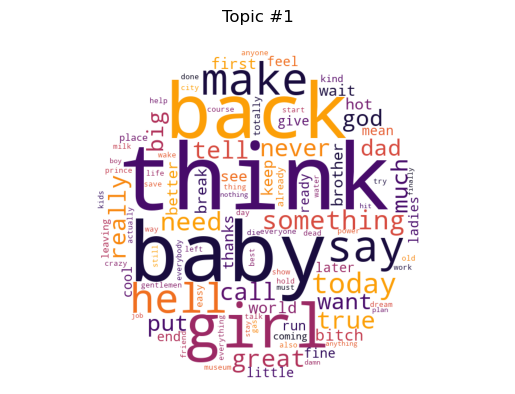

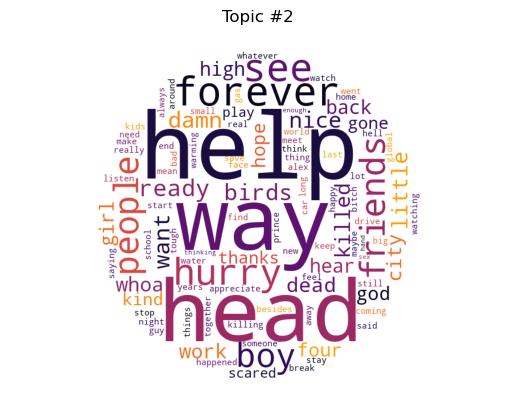

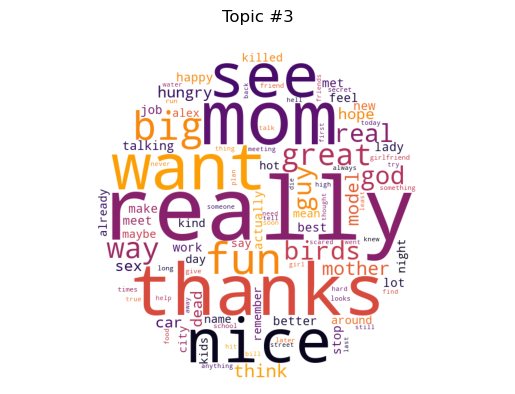

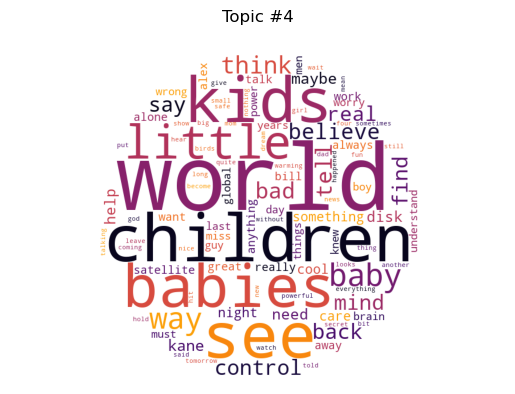

In [47]:
# lda is assumed to be the variable holding the LdaModel object
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from palettable.lightbartlein.diverging import BlueDarkOrange18_5
from palettable.matplotlib import Inferno_20
import random
from PIL import Image
import numpy as np

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Inferno_20.colors[random.randint(1,15)])

icon_path = "C:/Users/HP/Downloads/circle.png"

mask = np.array(Image.open(icon_path))

for t in range(ldamodel.num_topics):
    plt.figure()
    # wordcloud = WordCloud(background_color="white", max_font_size=60, width=800, height=400)
    wc = WordCloud(background_color="white", max_words=100, mask = mask,
                   stopwords=STOPWORDS,
                   max_font_size=160,
                   random_state=42,
                   width=800, height=400)
    plt.imshow(wc.fit_words(dict(ldamodel.show_topic(t, 200))).recolor(color_func=color_func, random_state=3))
    #wc.recolor(color_func=color_func)
    plt.axis("off")
    plt.title("Topic #" + str(t+1))
    #plt.show()
    plt.savefig("wcld-topiclow-#"+str(t)+".png", dpi = 800)
    

In [48]:
for t in range(ldamodel.num_topics):
    print("Topic #" + str(t+1))
    str1 = ", "
    pairs = ldamodel.show_topic(t, 15)
    words = [pair[0] for pair in pairs]
    print(str1.join(words))

Topic #1
think, baby, back, girl, make, say, hell, today, something, need, great, true, never, call, tell
Topic #2
help, way, head, forever, see, hurry, friends, people, boy, ready, damn, birds, want, nice, little
Topic #3
really, mom, thanks, want, see, nice, fun, big, great, way, birds, guy, god, real, mother
Topic #4
world, children, see, kids, babies, little, baby, way, think, tell, bad, believe, control, back, mind


In [51]:
# Memeriksa nilai alpha
model_alpha = ldamodel.alpha
print("Alpha values:", model_alpha)

# Memeriksa nilai beta
model_beta = ldamodel.eta
print("Beta values:", model_beta)

Alpha values: [0.38961035 0.25974026 0.19480518 0.15584415]
Beta values: [0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31
 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31
 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31
 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31
 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31
 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31
 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31
 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31
 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31
 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31
 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31
 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31
 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31 0.31
 0.3